EDA.
En esta fase, examinamos detalladamente la información disponible sobre los incidentes viales para descubrir patrones y comportamientos que puedan estar relacionados con el número de víctimas fatales.

Este proceso nos permitirá detectar posibles conexiones entre diversas variables y los accidentes con víctimas, lo que ayudará a ofrecer a las autoridades de tránsito una perspectiva más clara sobre los factores que agravan la seguridad vial. A través de herramientas como la visualización de datos, resúmenes estadísticos y análisis comparativos, buscamos ofrecer información útil para respaldar la toma de decisiones estratégicas y la creación de medidas preventivas más eficaces.

El propósito final de este análisis es contribuir a la disminución de las víctimas fatales en las vías de Buenos Aires, fomentando políticas y acciones que refuercen la seguridad vial, y así proteger la integridad de quienes circulan por la ciudad.

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df_hechos = pd.read_csv('./data_limpia/hechos_clean.csv')
df_victimas = pd.read_csv('./data_limpia/victimas_clean.csv')

In [16]:

print(df_hechos.info())
print(df_hechos.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 696 non-null    float64
 12  Cruce                  696 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  PARTIC

In [17]:
print(df_victimas.info())
print(df_victimas.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   ROL                  717 non-null    object
 3   VICTIMA              717 non-null    object
 4   SEXO                 717 non-null    object
 5   EDAD                 717 non-null    object
 6   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: object(7)
memory usage: 39.3+ KB
None
    ID_hecho       FECHA        ROL VICTIMA       SEXO EDAD  \
0  2016-0001  2016-01-01  CONDUCTOR    MOTO  MASCULINO   19   
1  2016-0002  2016-01-02  CONDUCTOR    AUTO  MASCULINO   70   
2  2016-0003  2016-01-03  CONDUCTOR    MOTO  MASCULINO   30   
3  2016-0004  2016-01-10  CONDUCTOR    MOTO  MASCULINO   18   
4  2016-0005  2016-01-21  CONDUCTOR    MOTO  MASCULINO   29   

   FECHA_FALLECIMIENTO  
0  20

In [20]:
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'])

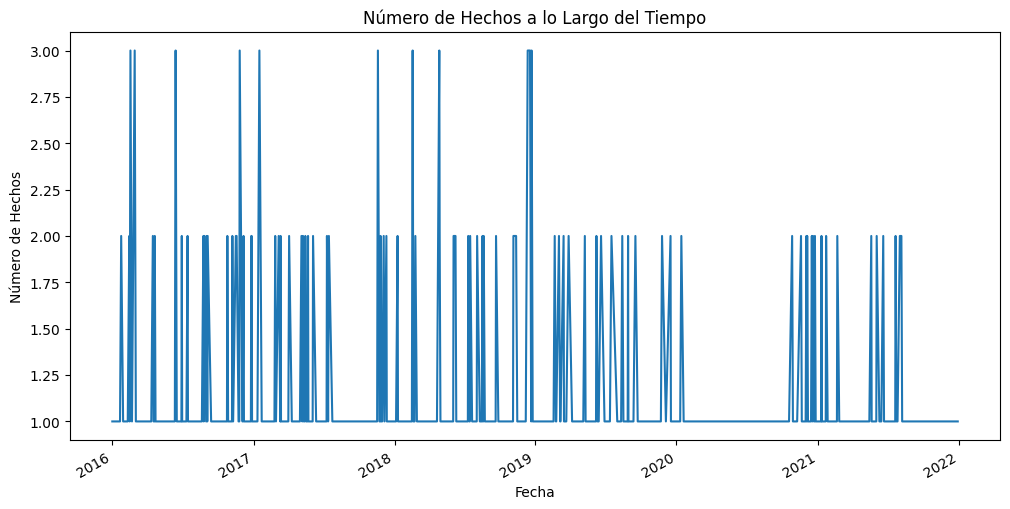

In [21]:
# Conteo de hechos por fecha
df_hechos['FECHA'].value_counts().sort_index().plot(figsize=(12, 6))
plt.title('Número de Hechos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Hechos')
plt.show()

La gráfica muestra grandes variaciones en la cantidad de "hechos" a lo largo del tiempo. Es decir, hay momentos en los que ocurren muchos hechos y otros en los que casi no hay.

No hay una tendencia clara: Los hechos no aumentan ni disminuyen de forma constante a lo largo de los años.

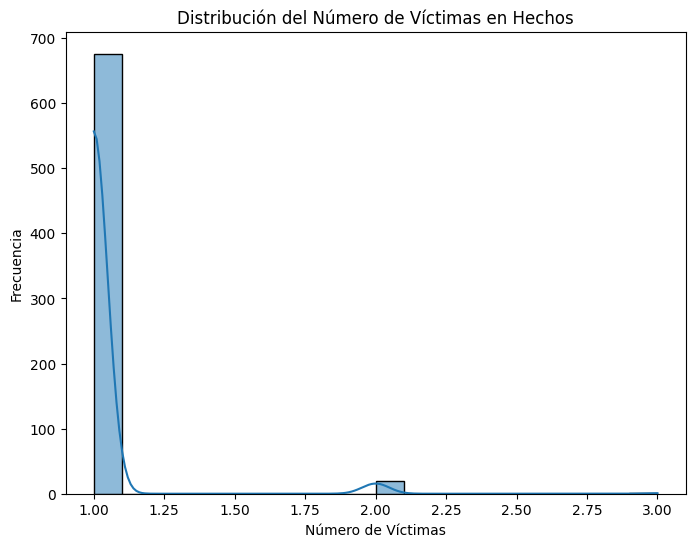

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df_hechos['N_VICTIMAS'], bins=20, kde=True)
plt.title('Distribución del Número de Víctimas en Hechos')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.show()


La gráfica muestra que la mayoría de los "hechos" registrados involucran aproximadamente 1 víctima. Hay una cantidad considerable de hechos con una sola víctima, y a medida que aumenta el número de víctimas, la frecuencia disminuye rápidamente. Esto sugiere que los hechos con múltiples víctimas son menos comunes.

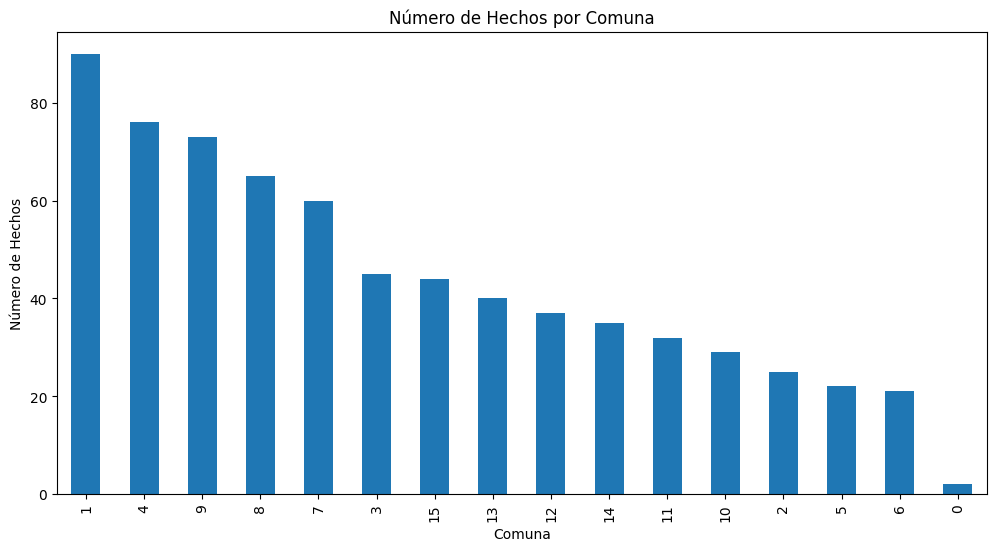

In [23]:
#Visualización del numero de hechos por comuna 
df_hechos['COMUNA'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Número de Hechos por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Hechos')
plt.show()

Esta gráfica de barras representa la distribución del número de "hechos" por comuna. Cada barra corresponde a una comuna y su altura indica la cantidad de hechos registrados en esa comuna.

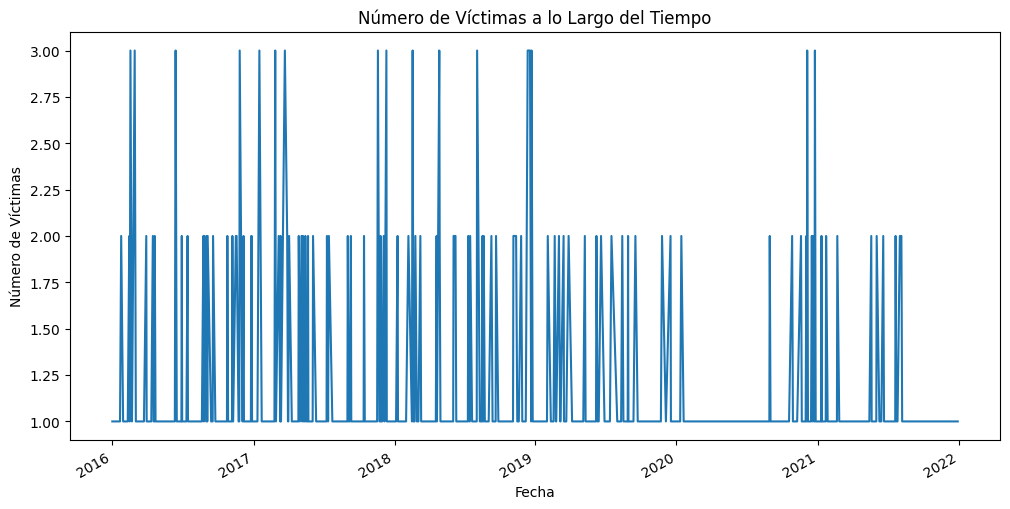

In [26]:
#Contamos las victimas por fecha
df_victimas['FECHA'].value_counts().sort_index().plot(figsize=(12, 6))
plt.title('Número de Víctimas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')
plt.show()

La gráfica muestra grandes variaciones en el número de víctimas a lo largo del tiempo. Esto significa que hay períodos en los que ocurren muchas más víctimas que en otros. No hay un patrón claro o una tendencia definida.

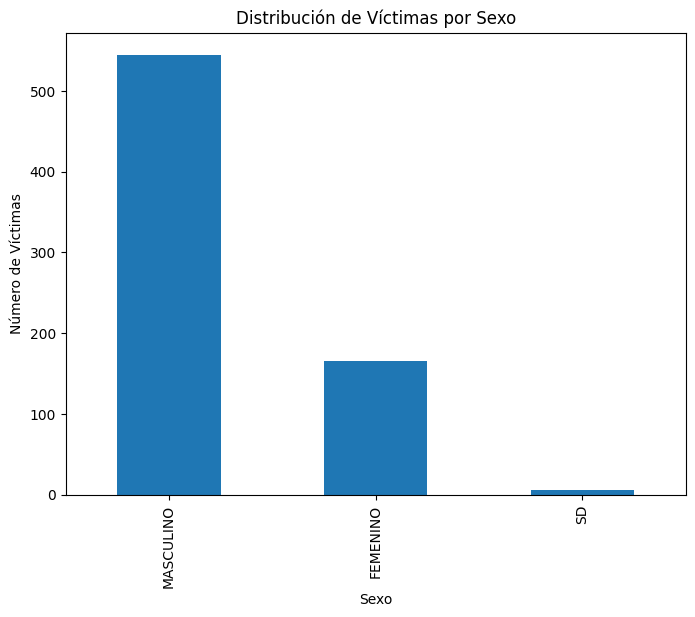

In [27]:
#Se analiza la distribución de las victimas por sexo 
df_victimas['SEXO'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Distribución de Víctimas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Víctimas')
plt.show()

In [ ]:
La gráfica muestra que la mayoría de las víctimas son hombres. Esto significa que los hombres tienen una probabilidad significativamente mayor de ser víctimas en comparación con las mujeres. La categoría de "sin datos" o "no determinado" es muy pequeña, lo que indica que la información sobre el sexo de las víctimas es bastante completa.

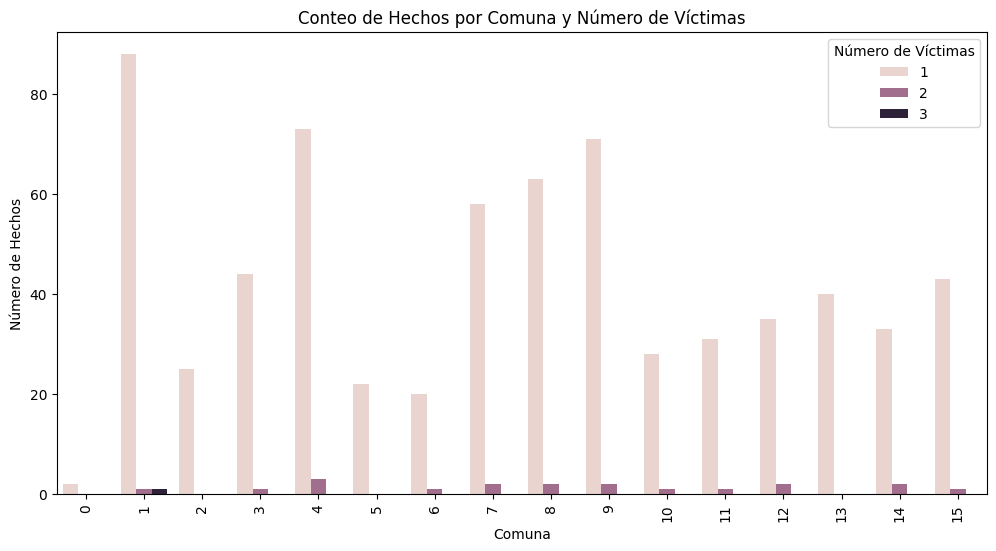

In [29]:
#Conteo de hechos por comuna y número de victimas 
plt.figure(figsize=(12, 6))
sns.countplot(data=df_hechos, x='COMUNA', hue='N_VICTIMAS')
plt.title('Conteo de Hechos por Comuna y Número de Víctimas')
plt.xlabel('Comuna')
plt.ylabel('Número de Hechos')
plt.legend(title='Número de Víctimas')
plt.xticks(rotation=90)
plt.show()


Lo que podemos ver es lo siguiente: El número total de hechos y la distribución de víctimas varía significativamente entre las diferentes comunas. Algunas comunas concentran un mayor número de hechos y de víctimas que otras. En general, la mayoría de los hechos registrados involucran una sola víctima (representada por el color más claro). Esto es evidente en la mayoría de las comunas.  La gráfica no muestra datos para hechos con un número mayor de víctimas, lo que podría indicar que este tipo de eventos son menos frecuentes.